# Advanced Programme in Deep Learning (Foundations and Applications)
## A Program by IISc and TalentSprint
### Assignment 21: Pre-Trained CNN Architectures for Computer Vision

## Learning Objectives


  At the end of the experiment, you will be able to understand:
  * How to use Pretrained CNN Architctures
  * How to implement CNN on Oxford-IIIT pet dataset
  * How to use ResNet and GoogleNet Pytorch Models for Computer Vision tasks

### Dataset Description

The Oxford-IIIT cats and dogs dataset consists pictures of cats and dogs 37 category pet dataset with roughly 200 images for each class. The images have a large variations in scale, pose and lighting. All images have an associated ground truth annotation of breed. There are about 200 images per category. Here is the [link](https://www.robots.ox.ac.uk/~vgg/data/pets/) to the dataset.

### Problem Statement
Given the cats and dogs images of 37 categories classify images using pretrained CNN architectures.

**ResNet-50**,
**GoogleNet Architectures**,



### Setup Steps:

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2236974" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "7259357831" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

ipython = get_ipython()

notebook= "M3_AST_21_Pretrained_models_for_Oxford_IIIT_pet_dataset_C" #name of the notebook

def setup():
    ipython.magic("sx wget https://cdn.iisc.talentsprint.com/DLFA/Experiment_related_data/oxfordiitimage.zip")
    ipython.magic("sx unzip oxfordiitimage.zip")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer1() and getAnswer2() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer1" : Answer1, "answer2" : Answer2, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://dlfa-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer1():
  try:
    if not Answer1:
      raise NameError
    else:
      return Answer1
  except NameError:
    print ("Please answer Question 1")
    return None

def getAnswer2():
  try:
    if not Answer2:
      raise NameError
    else:
      return Answer2
  except NameError:
    print ("Please answer Question 2")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import os,shutil,glob,PIL
import pathlib
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.init as init
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, utils
import matplotlib.pyplot as plt
import torchvision.models as models
import torch.optim as optim
from tqdm import tqdm

### Load the Oxford-IIIT Pet Dataset

Now,

* We will load the training set

* We will use  transform.compose() to convert the datasets into tensors using transforms.ToTensor(). We also normalize them by setting the mean and standard deviation using transforms.Normalize()

* we will resize the images to (224,224)



In [5]:
# Normalize with mean and std
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.4839, 0.4528, 0.3962), (0.2702, 0.2655, 0.2745))])

In [6]:
# Loading the train set file
train_data_folder = "/content/oxfordiitimage/train" # Train directory for loading images
train_data = datasets.ImageFolder(root=train_data_folder, transform=transform)

**torch.utils.data.DataLoader** class represents a Python iterable over a dataset, with following features.

1. Batching the data
2. Shuffling the data
3. Load the data in parallel using multiprocessing workers.


The batches of train and test data are provided via data loaders that provide iterators over the datasets to train our models.



In [7]:
# Initializing batch size
batch_size = 64

# Loading the train dataset
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

In [8]:
# Generate a batches of images and labels
train_images, train_labels = next(iter(train_loader))
train_images.shape, train_labels.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

### Visualizing the train images

In [9]:
# labels Translator
label_names = {v: k for k, v in train_data.class_to_idx.items()}
label_names

{0: 'Abyssinian',
 1: 'American bulldog',
 2: 'American pit bull terrier',
 3: 'Basset hound',
 4: 'Beagle',
 5: 'Bengal',
 6: 'Birman',
 7: 'Bombay',
 8: 'Boxer',
 9: 'British shorthair',
 10: 'Chihuahua',
 11: 'Egyptian mau',
 12: 'English cocker spaniel',
 13: 'English setter',
 14: 'German shorthaired',
 15: 'Great pyrenees',
 16: 'Havanese',
 17: 'Japanese chin',
 18: 'Keeshond',
 19: 'Leonberger',
 20: 'Maine coon',
 21: 'Miniature pinscher',
 22: 'Newfoundland',
 23: 'Persian',
 24: 'Pomeranian',
 25: 'Pug',
 26: 'Ragdoll',
 27: 'Russian blue',
 28: 'Saint bernard',
 29: 'Samoyed',
 30: 'Scottish terrier',
 31: 'Shiba inu',
 32: 'Siamese',
 33: 'Sphynx',
 34: 'Staffordshire bull terrier',
 35: 'Wheaten terrier',
 36: 'Yorkshire terrier'}

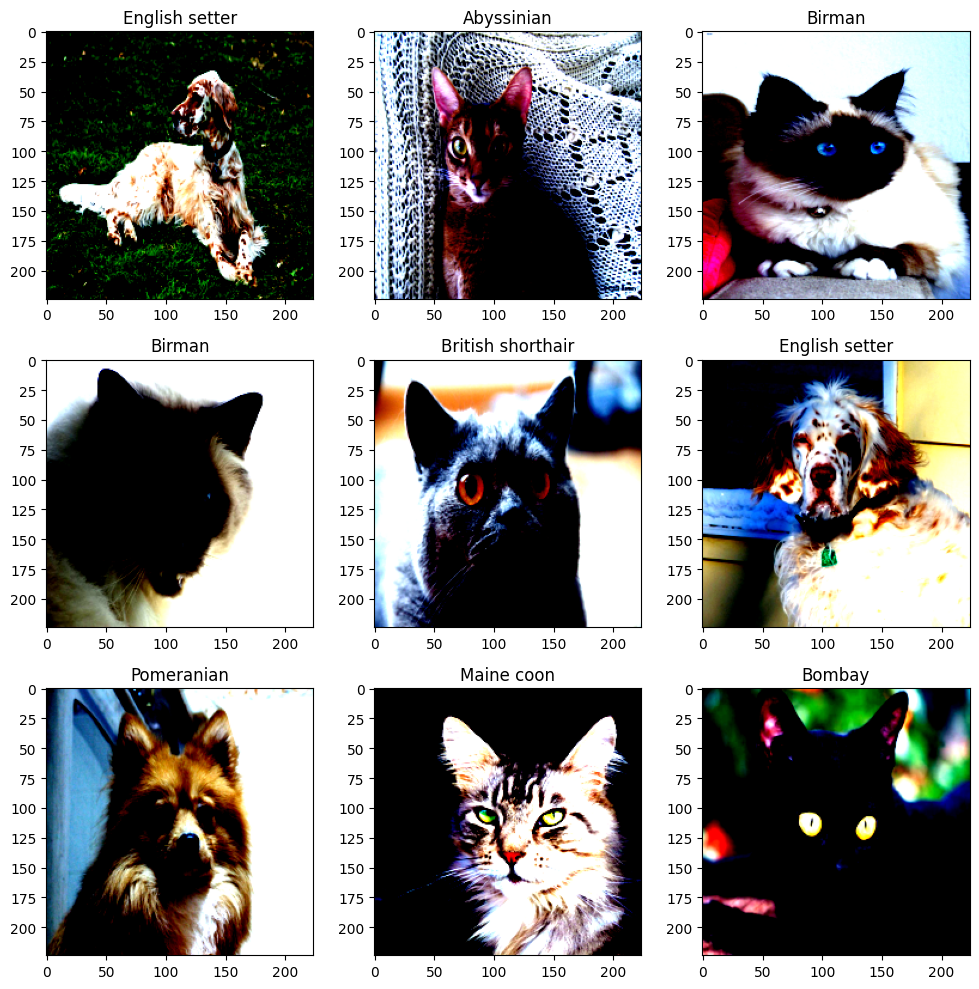

In [10]:
# Create a grid of images along with their corresponding labels
L = 3
W = 3

fig, axes = plt.subplots(L, W, figsize = (10, 10))
axes = axes.reshape(-1)

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i].permute(1, 2, 0))
    axes[i].set_title(label_names[train_labels[i].item()])
    axes[i].axis('on')

plt.tight_layout()

Calculation of mean and standard deviation of images for normalizing the images with Pytorch transformations

In [11]:
# mean = 0.0
# for img, _ in train_data:
#   mean += img.mean([1,2])
# mean = mean/len(train_data)
# print(mean)

In [12]:
# sumel = 0.0
# countel = 0
# for img, _ in train_data:
#     img = (img - mean.unsqueeze(1).unsqueeze(1))**2
#     sumel += img.sum([1, 2])
#     countel += torch.numel(img[0])
# std = torch.sqrt(sumel/countel)
# print(std)

Let us check the number of classes present in train data set

In [13]:
# No of Categories
len(train_data.classes)

37

In [14]:
# Number of training samples
len(train_data)

5171

In [15]:
# Size of one training image
train_data[0][0].size()

torch.Size([3, 224, 224])

The train and test data are provided via data loaders that provide iterators over the datasets.

The first element of training data (X_train) is a 4th-order tensor of size (batch_size, 3, 224, 224), i.e. it consists of a batch of images of size 3x64x64 pixels where '3' represents 3 input image channel i.e. RGB. y_train is a vector containing the correct classes.


In [16]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([64, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([64]) type: torch.LongTensor


### Initializing CUDA

CUDA is used as an interface between our code and the GPU.

Normally, we run the code in the CPU. To run it in the GPU, we need CUDA. Check if CUDA is available:

In [17]:
# To test whether GPU instance is present in the system of not.
use_cuda = torch.cuda.is_available()
print('Using PyTorch version:', torch.__version__, 'CUDA:', use_cuda)

Using PyTorch version: 2.0.1+cu118 CUDA: True


If it's False, then we run the program on CPU. If it's True, then we run the program on GPU.

Let us initialize some GPU-related variables:

In [18]:
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [19]:
!nvidia-smi

Sat Jun 17 05:40:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## ImageNet Dataset

**ImageNet** is an image database containing 1000 categories and 1.2 million images, in which each node of the hierarchy is depicted by hundreds and thousands of images. The project has been instrumental in advancing computer vision and deep learning research. The data is available for free to researchers for non-commercial use.

### Transfer Learning
**Transfer learning** consists of taking features learned on one problem, and leveraging them on a new, similar problem.

Also, here we are using a **pre-trained model** which is a saved network that was previously trained on a ImageNet dataset.

The intuition behind transfer learning for image classification is that if a model is trained on a large and general enough dataset, this model will effectively serve as a generic model of the visual world. You can then take advantage of these learned feature maps without having to start from scratch by training a large model on a large dataset.

For eg. using ResNet50, we remove the last layer which takes a probability for each of the 1000 classes in the ImageNet and replaces it with a layer that takes 37 probabilities in our case.


#### ResNet - 50

Before moving ahead with Transfer Learning using ResNet, let us first try to understand about ResNet50 and it's architecture.

ResNet-50 is a convolutional neural network that is 50 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.



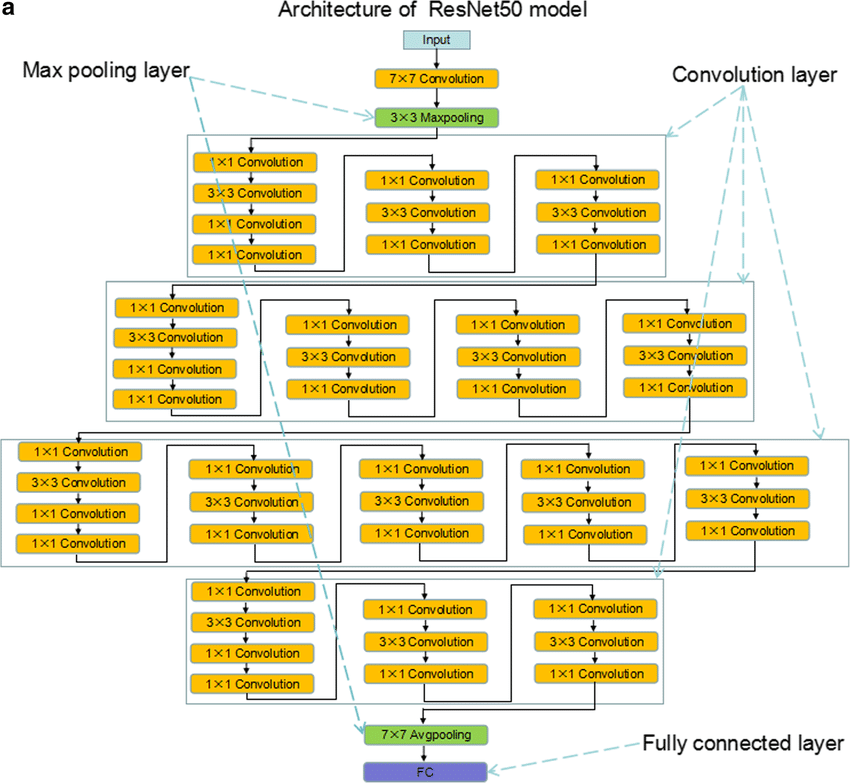

Since, now we are aware of ResNet50 and it's architecture, let us build the model.

In [20]:
model_ft = models.resnet50(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 37)
model_ft = model_ft.to(device)
print(model_ft)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 170MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

We can see that ResNet50 model is downloaded and we tuned its number of ouput features to 37.

#### Defining Adam Optimizer and Loss function
Here, we will implement Adam optmizer using `torch.optim` module.

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.parameters(), lr=0.001)

### Training the model

Let's now define functions to train() the model.

In Training Phase, we iterate over a batch of images in the train_loader. For each batch, we perform  the following steps:

* First we zero out the gradients using zero_grad()

* We pass the data to the model i.e. we perform forward pass by calling the forward()

* We calculate the loss using the actual and predicted labels

* Perform Backward pass using backward() to update the weights

In [22]:
train_accu = []     # Empty list for saving train accuracy
train_losses = []   # Empty list for saving train losses

def train(epoch):

  print('\nEpoch : %d'%epoch)

  model_ft.train()    # Initiate the model in training mode

  running_loss=0
  correct=0
  total=0

  # Loop through each batch of images in train set
  for data in tqdm(train_loader):

    inputs, labels = data[0].to(device), data[1].to(device)   # Loading the input tensors into CUDA GPU

    # Zero out the gradients from the preivous step
    optimizer.zero_grad()

    # Forward pass (this calls the "forward" function within model_ft)
    outputs = model_ft(inputs)

    # Calculating the loss
    loss = criterion(outputs, labels)

    # Back Propagation for calculaing gradients and adjusting weights
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

    # Picking the class/label with maximum probability
    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()


  train_loss = running_loss/len(train_loader)     # Calculating the mean of training loss
  accu = 100.*correct/total                       # Calculating the accuracy

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

Let us train the model for 20 epochs.

In [23]:
epochs = 20
for epoch in range(1, epochs+1):
  train(epoch)


Epoch : 1


100%|██████████| 81/81 [01:37<00:00,  1.21s/it]


Train Loss: 1.459 | Accuracy: 56.159

Epoch : 2


100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


Train Loss: 0.803 | Accuracy: 74.357

Epoch : 3


100%|██████████| 81/81 [01:32<00:00,  1.15s/it]


Train Loss: 0.620 | Accuracy: 79.675

Epoch : 4


100%|██████████| 81/81 [01:35<00:00,  1.18s/it]


Train Loss: 0.451 | Accuracy: 84.800

Epoch : 5


100%|██████████| 81/81 [01:33<00:00,  1.15s/it]


Train Loss: 0.352 | Accuracy: 88.455

Epoch : 6


100%|██████████| 81/81 [01:31<00:00,  1.13s/it]


Train Loss: 0.307 | Accuracy: 90.215

Epoch : 7


100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


Train Loss: 0.241 | Accuracy: 92.245

Epoch : 8


100%|██████████| 81/81 [01:31<00:00,  1.13s/it]


Train Loss: 0.270 | Accuracy: 91.259

Epoch : 9


100%|██████████| 81/81 [01:32<00:00,  1.15s/it]


Train Loss: 0.173 | Accuracy: 94.914

Epoch : 10


100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


Train Loss: 0.102 | Accuracy: 96.674

Epoch : 11


100%|██████████| 81/81 [01:32<00:00,  1.15s/it]


Train Loss: 0.191 | Accuracy: 93.638

Epoch : 12


100%|██████████| 81/81 [01:31<00:00,  1.13s/it]


Train Loss: 0.149 | Accuracy: 94.933

Epoch : 13


100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


Train Loss: 0.106 | Accuracy: 96.809

Epoch : 14


100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


Train Loss: 0.126 | Accuracy: 95.765

Epoch : 15


100%|██████████| 81/81 [01:31<00:00,  1.13s/it]


Train Loss: 0.086 | Accuracy: 97.351

Epoch : 16


100%|██████████| 81/81 [01:33<00:00,  1.15s/it]


Train Loss: 0.086 | Accuracy: 97.293

Epoch : 17


100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


Train Loss: 0.086 | Accuracy: 97.215

Epoch : 18


100%|██████████| 81/81 [01:32<00:00,  1.14s/it]


Train Loss: 0.181 | Accuracy: 94.140

Epoch : 19


100%|██████████| 81/81 [01:31<00:00,  1.13s/it]


Train Loss: 0.132 | Accuracy: 95.455

Epoch : 20


100%|██████████| 81/81 [01:32<00:00,  1.15s/it]

Train Loss: 0.149 | Accuracy: 95.281


Now, let us save the trained model for inferencing in future.

In [24]:
PATH='/content/Oxford-IIIT-ResNet50.pth'
torch.save(model_ft.state_dict(), PATH)

### Plotting the train accuracy and train loss vs epochs

#### Plotting train accuracy

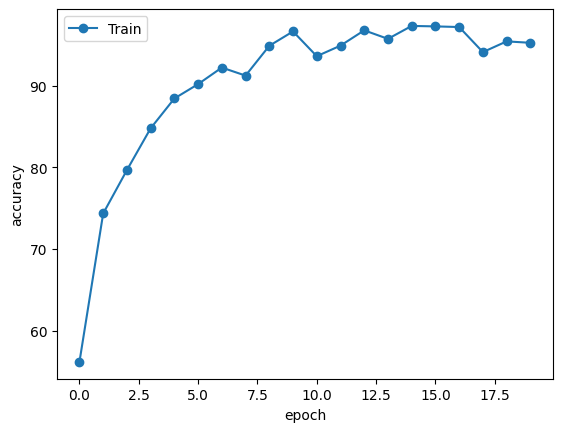

In [25]:
plt.plot(train_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

#### Plotting train loss

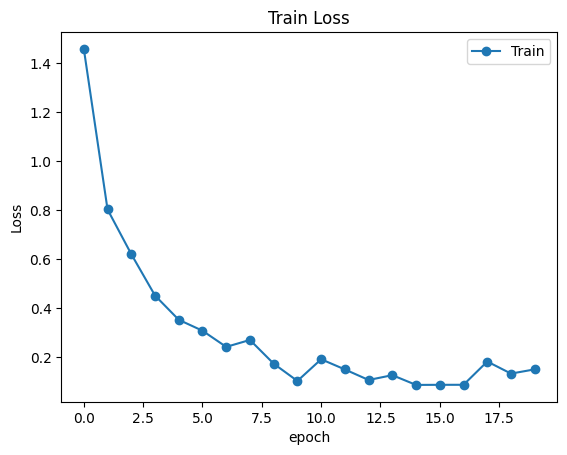

In [26]:
plt.plot(train_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.title('Train Loss')
plt.show()

Let us load the model weights using `load_state_dict` function

Note that `load_state_dict` function takes dictionary object ,not a path to saved object .This means that you must deserialize the saved `state_dict` before you pass it to the `load_state_dict()` function.

In [27]:
PATH = '/content/Oxford-IIIT-ResNet50.pth'
model_ft.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### Prediction on the test images
Our trained model is applied on test directory and the output tensor containing labels is saved in predictions.

Now, let us initiate the Pytorch model in eval() mode.

`model_ft.eval()` is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. For example, Dropouts Layers, BatchNorm Layers etc. You need to turn off them during model evaluation, and `.eval()` will do it for you

In [28]:
model_ft.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Here, we will resize the test images to (224,224) and normalize them with mean and standard deviation.

In [29]:
# Load the testset
test_data_folder = "/content/oxfordiitimage/test" # Train directory for loading images
test_data = datasets.ImageFolder(root=test_data_folder, transform=transform)

Loading the images using `DataLoader()` with batch_size = 1 to be suitable for prediction

In [30]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=1)

Here we are predicting images and comparing them with actual labels(Ground truth) for counting correct predictions

In [31]:
predictions = []
labels = []
j = 0

# Loop through the test set
for i, data in enumerate(test_loader):
  input, label = data
  # print(input.shape ,test_data.classes[label])

  # Forward pass (this calls the "forward" function within model_ft)
  output = model_ft(input.to(device))

  # Output as max probability
  pred = torch.max(output,1)

  # Storing the actuals and the predictions
  labels.append(test_data.classes[label])
  predictions.append(test_data.classes[pred.indices])
  if test_data.classes[pred.indices] == test_data.classes[label]:
    j+=1

### Accuracy of ResNet50 model on test dataset

In [32]:
print(j/len(test_loader))

0.6340694006309149


### Saving the labels(Ground truth) and prediction to a DataFrame for comaparison

In [33]:
results = pd.DataFrame()
results['Labels'] = pd.Series(labels)
results['Predictions'] = pd.Series(predictions)

In [34]:
# Here we are creating a column to show whether prediction is Correct/Wrong
results['Correct/Wrong'] = np.where((results['Labels'] == results['Predictions']) , "Correct", "Wrong")

###Saving the results to a csv file

In [35]:
results.to_csv("ResNet50_Predictions.csv")

In [36]:
wrong_prediction = results[results['Correct/Wrong'] == "Wrong"]
wrong_prediction.head()

,Labels,Predictions,Correct/Wrong
1,Abyssinian,Maine coon,Wrong
2,Abyssinian,German shorthaired,Wrong
3,Abyssinian,Maine coon,Wrong
4,Abyssinian,Bengal,Wrong
5,Abyssinian,Bengal,Wrong


#### Count of correct predictions and wrong predictions

In [37]:
results["Correct/Wrong"].value_counts()

Correct    1407
Wrong       812
Name: Correct/Wrong, dtype: int64

In [38]:
correct_prediction = results[results['Correct/Wrong'] == "Correct"]
correct_prediction.head()

,Labels,Predictions,Correct/Wrong
0,Abyssinian,Abyssinian,Correct
8,Abyssinian,Abyssinian,Correct
10,Abyssinian,Abyssinian,Correct
16,Abyssinian,Abyssinian,Correct
18,Abyssinian,Abyssinian,Correct


### GoogleNet

Before moving ahead with Transfer Learning using GoogleNet, let us first try to understand about GoogleNet and it's architecture.

GoogLeNet is a convolutional neural network that is 22 layers deep. You can load a pretrained version of the network trained on either the ImageNet data set. The network trained on ImageNet classifies images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. These networks have learned different feature representations for a wide range of images. The pretrained networks both have an image input size of 224-by-224.


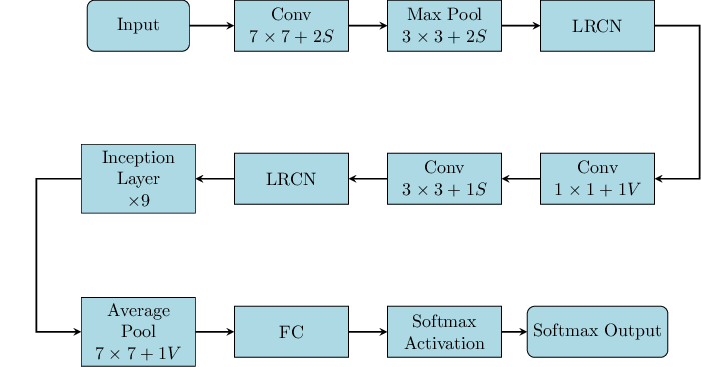

Since, now we are aware of GoogleNet and it's architecture, let us build the model.

In [39]:
model_ft = models.googlenet(pretrained=True)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs,37)
model_ft = model_ft.to(device)
print(model_ft)

Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 43.2MB/s]


GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

We can see that GoogleNet model is downloaded and we tuned its number of ouput features to 37.

#### Implementing Adam Optimizer and Loss function
Here, we will implement Adam optmizer using `torch.optim` module.

In [40]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_ft.parameters(), lr=0.001)

Let us create helper function to train function the images.

In [41]:
train_accu = []     # Empty list for saving train accuracy
train_losses = []   # Empty list for saving train losses
def train(epoch):
  print('\nEpoch : %d'%epoch)

  model_ft.train()    # Initiate the model in training mode

  running_loss = 0
  correct = 0
  total = 0

  for data in tqdm(train_loader):

    inputs,labels=data[0].to(device),data[1].to(device)   # Loading the input tensors into CUDA GPU

    optimizer.zero_grad()
    outputs = model_ft(inputs)
    loss = criterion(outputs,labels)  # Calculating the loss
    loss.backward()                   # Back Propagation for calculaing gradients and adjusting weights
    optimizer.step()

    running_loss += loss.item()

    _, predicted = outputs.max(1)
    total += labels.size(0)
    correct += predicted.eq(labels).sum().item()


  train_loss = running_loss/len(train_loader)     # Calculating the mean of training loss
  accu = 100.*correct/total                       # Calculating the accuracy

  train_accu.append(accu)
  train_losses.append(train_loss)
  print('Train Loss: %.3f | Accuracy: %.3f'%(train_loss,accu))

Let us train the model for 20 epochs.

In [ ]:
epochs = 20
for epoch in range(1, epochs+1):
  train(epoch)


Epoch : 1


100%|██████████| 81/81 [00:59<00:00,  1.37it/s]


Train Loss: 1.092 | Accuracy: 70.547

Epoch : 2


100%|██████████| 81/81 [00:59<00:00,  1.35it/s]


Train Loss: 0.370 | Accuracy: 88.184

Epoch : 3


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.244 | Accuracy: 92.419

Epoch : 4


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.161 | Accuracy: 95.223

Epoch : 5


100%|██████████| 81/81 [01:01<00:00,  1.32it/s]


Train Loss: 0.134 | Accuracy: 95.900

Epoch : 6


100%|██████████| 81/81 [01:00<00:00,  1.35it/s]


Train Loss: 0.130 | Accuracy: 96.036

Epoch : 7


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.149 | Accuracy: 95.243

Epoch : 8


100%|██████████| 81/81 [01:00<00:00,  1.34it/s]


Train Loss: 0.110 | Accuracy: 96.712

Epoch : 9


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.072 | Accuracy: 97.660

Epoch : 10


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.103 | Accuracy: 96.674

Epoch : 11


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.138 | Accuracy: 95.668

Epoch : 12


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.063 | Accuracy: 98.105

Epoch : 13


100%|██████████| 81/81 [00:59<00:00,  1.36it/s]


Train Loss: 0.041 | Accuracy: 98.878

Epoch : 14


100%|██████████| 81/81 [00:58<00:00,  1.39it/s]


Train Loss: 0.045 | Accuracy: 98.859

Epoch : 15


100%|██████████| 81/81 [00:58<00:00,  1.38it/s]


Train Loss: 0.075 | Accuracy: 97.641

Epoch : 16


100%|██████████| 81/81 [00:58<00:00,  1.38it/s]


Train Loss: 0.119 | Accuracy: 95.958

Epoch : 17


100%|██████████| 81/81 [00:58<00:00,  1.39it/s]


Train Loss: 0.106 | Accuracy: 96.654

Epoch : 18


100%|██████████| 81/81 [00:58<00:00,  1.38it/s]


Train Loss: 0.037 | Accuracy: 98.898

Epoch : 19


100%|██████████| 81/81 [00:58<00:00,  1.39it/s]


Train Loss: 0.035 | Accuracy: 98.898

Epoch : 20


100%|██████████| 81/81 [00:58<00:00,  1.38it/s]

Train Loss: 0.041 | Accuracy: 98.646


To improve the accuracy run the model for more no of epochs

Now, let us save the trained model for inferencing in future.

In [ ]:
PATH = '/content/Oxford-IIIT-GoogleNet.pth'
torch.save(model_ft.state_dict(), PATH)

### Plotting the train accuracy and train loss vs epochs

#### Plotting train accuracy

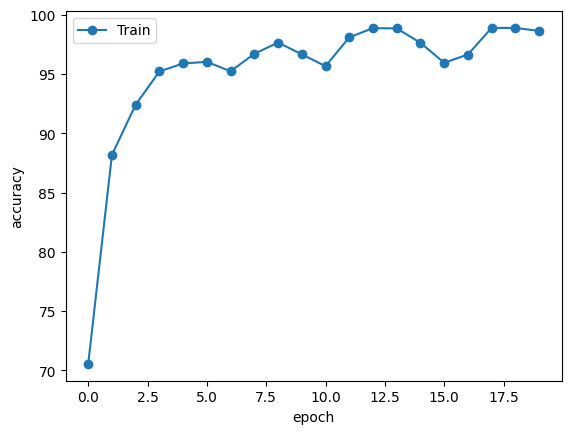

In [ ]:
plt.plot(train_accu,'-o')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['Train'])
plt.show()

#### Plotting train loss

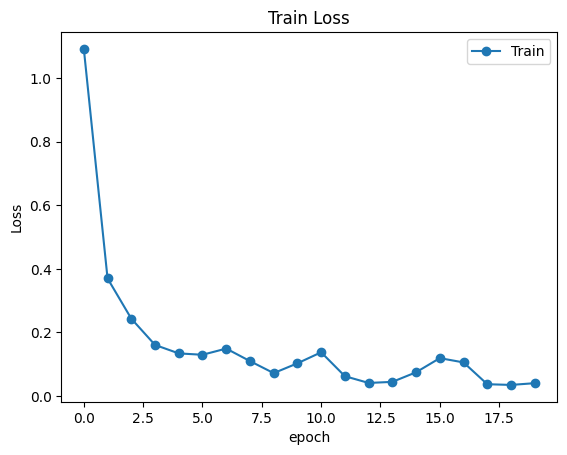

In [ ]:
plt.plot(train_losses,'-o')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.title('Train Loss')
plt.show()

Let us load the model weights using `load_state_dict` function

Note that `load_state_dict` function takes dictionary object ,not a path to saved object .This means that you must deserialize the saved `state_dict` before you pass it to the `load_state_dict()` function.

In [ ]:
PATH='/content/Oxford-IIIT-GoogleNet.pth'
model_ft.load_state_dict(torch.load(PATH))

<All keys matched successfully>

### Prediction on the test images
Our trained model is applied on test directory and the output tensor containing labels is saved in predictions.

Now, let us initiate the Pytorch model in eval() mode.

`model_ft.eval()` is a kind of switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. For example, Dropouts Layers, BatchNorm Layers etc. You need to turn off them during model evaluation, and `.eval()` will do it for you

In [ ]:
model_ft.eval()

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

Here we are predicting images and comparing them with actual labels(Ground truth) for counting correct predictions

In [ ]:
predictions = []
labels = []
j = 0
for i,data in enumerate(test_loader):
  input,label = data
  output = model_ft(input.to(device))
  pred = torch.max(output,1)
  labels.append(test_data.classes[label])
  predictions.append(test_data.classes[pred.indices])
  if test_data.classes[pred.indices] == test_data.classes[label]:
    j+=1

### Accuracy of GoogleNet model on test dataset

In [ ]:
print(j/len(test_loader))

0.7314105452906715


### Saving the labels(Ground truth) and prediction to a DataFrame for comaparing

In [ ]:
results = pd.DataFrame()
results['Labels'] = pd.Series(labels)
results['Predictions'] = pd.Series(predictions)

In [ ]:
# Here we are creating a column to show whether prediction is Correct/Wrong
results['Correct/Wrong'] = np.where((results['Labels'] == results['Predictions']) , "Correct", "Wrong")

###Saving the results to a csv file

In [ ]:
results.to_csv("GoogleNet_Predictions.csv")

In [ ]:
wrong_prediction = results[results['Correct/Wrong'] == "Wrong"]
wrong_prediction.head()

,Labels,Predictions,Correct/Wrong
4,Abyssinian,Bengal,Wrong
9,Abyssinian,Bengal,Wrong
10,Abyssinian,Bengal,Wrong
11,Abyssinian,Bombay,Wrong
14,Abyssinian,Bengal,Wrong


#### Count of correct predictions and wrong predictions

In [ ]:
results["Correct/Wrong"].value_counts()

Correct    1623
Wrong       596
Name: Correct/Wrong, dtype: int64

In [ ]:
correct_prediction = results[results['Correct/Wrong'] == "Correct"]
correct_prediction.head()

### Please answer the questions below to complete the experiment:




#### Consider the following statements about Transfer learning and answer Q1.

A. Transfer learning enables feature extraction with pre-trained deep learning models.

B. Transfer learning involves using models trained on one problem as a starting point on a related problem.

C. Top performing models such as ResNet-50, GoogleNet can be downloaded and used directly, or integrated into a new model for your own computer vision problems.

D. Transfer learning has the benefit of decreasing the training time for a neural network model and can result in lower generalization error.

In [ ]:
#@title Q1. Which of the above statements is/are True regrading transfer learning?
Answer1 = "A, B, C and D" #@param ["", "Only A and B", "Only C and D", "Only A, B and D", "Only B, C and D", "Only A, B and C", "A, B, C and D"]


In [ ]:
#@title Q2. A problem with deep convolutional neural networks is that the number of feature maps often increases with the depth of the network. This problem can result in a dramatic increase in the number of parameters and computation required when larger filter sizes are used, such as 5×5 and 7×7. To address this problem, a 1×1 convolutional layer can be used that offers a channel-wise pooling, often called feature map pooling. This simple technique can be used for dimensionality reduction, decreasing the number of feature maps while retaining their salient features.
Answer2 = "TRUE" #@param ["","TRUE","FALSE"]


In [ ]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [ ]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "None" #@param {type:"string"}


In [ ]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [ ]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [ ]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")